<img src="images/qiskit_banner.png" width="500 px" align="left">

# Getting Started with Qiskit

Here, we provide an overview of working with Qiskit.  The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [**quantum circuit**](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

## Qubit States

Qubit states are represented as vectors of the form

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

with complex coeffcients $\alpha$ and $\beta$ which fulfill the relation $|\alpha^2|+|\beta^2|=1$. 

These qubit states can be represented on a sphere, the so called Bloch sphere. For example the state $|\psi\rangle = |0\rangle$ looks like

In [1]:
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

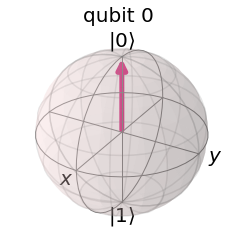

In [2]:
plot_bloch_multivector([1,0])

A qubit state are manipulated by applying *quantum gates* to it which rotate the state vector on the Bloch sphere. There are a couple of standard gates that can be applied to single and multiple qubits, like

<img src="images/gates.png" width="600 px" align="center">

**Note**: Unlike many classical logic gates, quantum gates are reversable! Applying the same gate in succession leaves the quantum state unchanged.

### Example: Hadamard-gate

Initial qubit state $|0\rangle $

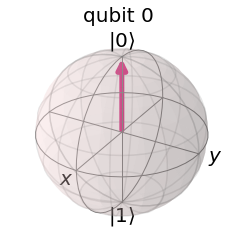

In [3]:
plot_bloch_multivector([1,0])

State after applying a Hadamard gate

$$H|0\rangle = \frac{1}{\sqrt(2)}\Big(|0\rangle + |1\rangle\Big)$$

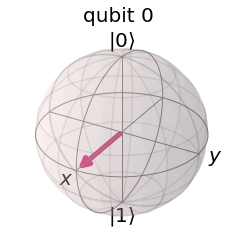

In [4]:
plot_bloch_multivector([.707,.707])

### Example: T-gate

Lets assume our qubit is initially in a equal superpostion as shown in the example above.
If we apply the T-gate we obtain the state

$$
TH|0\rangle = \frac{1}{\sqrt(2)}\Big(|0\rangle + \mathrm{e}^{\mathrm{i} \pi/4}|1\rangle\Big)
$$

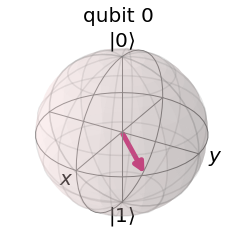

In [5]:
plot_bloch_multivector([0.707 , 0.5  +0.5j])

A qubit register to which a sequence of gates is applied is known as a *quantum circuit*. These circuits represent our quantum algorithms.

## Circuit Basics <a name='basics'></a>


### Building the circuit

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of three qubits.

#### 1. Step: Define Registers and Circuit

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [7]:
# Create a Quantum Circuit acting on the quantum and classical register
q = QuantumRegister(3 ,'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit Greenberger–Horne–Zeilinger (GHZ) state

$$|\psi\rangle = \frac{1}{\sqrt{2}}\Big(|000\rangle+|111\rangle\Big).$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
1. A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$.
2. A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1, which puts it into the two-qubit Bell state $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right).$
3. A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

#### 2. Add Gates

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [8]:
qc.h(q[0])         # Add a H gate on qubit 0, putting this qubit in superposition.
qc.cx(q[0], q[1])  # Add a CX (CNOT) gate on control qubit 0 and target qubit 1
qc.cx(q[0], q[2]); # Add a CX (CNOT) gate on control qubit 0 and target qubit 2

**Visualize Circuit**

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

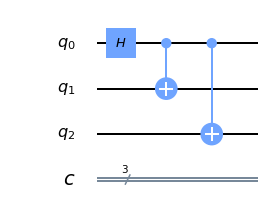

In [9]:
qc.draw(output='mpl')

In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

How do we know the quantum circuit is doing what we want it to do? Well... we can for example simulate it. IBM qiskit is providing a couple of simulator backends. Lets try them out...

## Simulating circuits using Qiskit Aer <a name='simulation'></a>

Qiskit Aer is our package for simulating quantum circuits. It provides many different backends for doing a simulation. 

### Statevector backend

The most common backend in Qiskit Aer is the `statevector_simulator`. This simulator returns the quantum 
state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits 
(so be careful using this as it will quickly get too large to run on your machine).

To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to `statevector_simulator`.

In [10]:
# Import Aer
from qiskit import Aer, execute

In [11]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

Now that we have chosen the backend, it's time to compile and run the quantum circuit. In Qiskit we provide the `execute` function for this. ``execute`` returns a ``job`` object that encapsulates information about the job submitted to the backend.

In [12]:
# Create a Quantum Program for execution 
job = execute(qc, backend)

When you run a program, a job object is made that has the following two useful methods: 
`job.status()` and `job.result()`, which return the status of the job and a result object, respectively.

In [13]:
result = job.result()

The results object contains the data and Qiskit provides the method 
`result.get_statevector(circ)` to return the state vector for the quantum circuit.

In [14]:
from utils.libquantum import print_sv
outputstate = result.get_statevector(qc, decimals=3)
print_sv(outputstate, mode='row')

'(0.707+0j)|000⟩ + (0.707+0j)|111⟩'

Qiskit also provides a visualization toolbox to allow you to view these results.

Below, we use the visualization function to plot the real and imaginary components of the state density matrix \rho.

In [15]:
from qiskit.visualization import plot_state_city
#plot_state_city(outputstate)

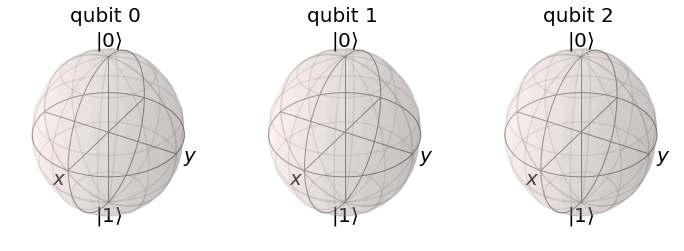

In [16]:
plot_bloch_multivector(outputstate)

Why do we not see any quantum states indicated in the Bloch spheres? Because we have generated an **entangled state**. In a entangled state the single qubits do not have an own state independent from the other qubits. Instead in an entagled system all qubits behave like **one** single system. 

In consequence, this means that the measurement on just one single qubit allows us to say in which state all the other qubits are! In the above example: if we measure qubit $1$ and get the result $0$, we know exactly the state of the two remaining qubits even without measuring them.

### OpenQASM backend

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by _measuring_ each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits. 

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state 

$$|\psi\rangle = \frac{1}{\sqrt{2}}\Big(|000\rangle +|111\rangle\Big),$$

and let $xyz$ denote the bitstring that results. Recall that, under the qubit labeling used by Qiskit, $x$ would correspond to the outcome on qubit 2, $y$ to the outcome on qubit 1, and $z$ to the outcome on qubit 0. 

Recall the probability of obtaining outcome $xyz$ is given by
$$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$$ and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.

In [17]:
# Create a Quantum Circuit on the same registers as before
meas = QuantumCircuit(q, c)
meas.barrier(q)

# map the quantum measurement to the classical bits
meas.measure(q, c);

In [18]:
# The Qiskit circuit object supports composition using
# the addition operator.
circ = qc + meas

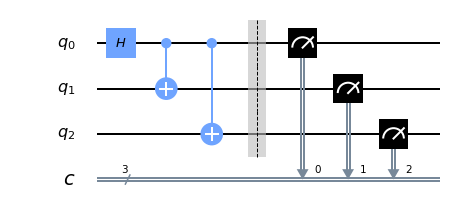

In [19]:
#drawing the circuit
circ.draw(output='mpl')

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits. 

To simulate this circuit, we use the ``qasm_simulator`` in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the ``execute`` function, via the ``shots`` keyword.

In [20]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

In [21]:
# Execute the circuit on the qasm simulator.
job_sim = execute(circ, backend_sim, shots=1024, memory=True)

In [22]:
# Grab the results from the job.
result_sim = job_sim.result()

In [23]:
# Show first ten samples
samples = result_sim.get_memory()
samples[:10]

['111', '000', '111', '000', '000', '000', '111', '000', '111', '111']

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [24]:
counts = result_sim.get_counts(circ)
print(counts)

{'111': 517, '000': 507}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

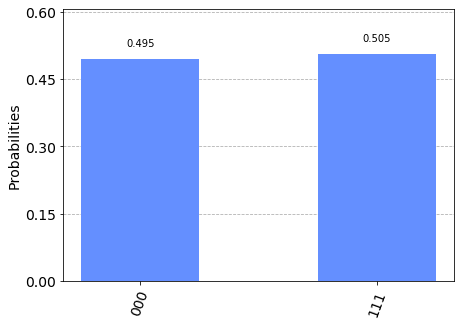

In [25]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``execute`` function and see how the estimated probabilities change.

## Questions:
- How can the state of a qubit be vizualized?
- What is the effect of a single-qubit gate on the state of qubit?
- What is the effect of a Hadamard on a qubit state?
- When do we say two qubits are entangled?
- What gate is neccessary to create entangled states?
- Do quantum algorithms always give the same solution?

## Excercise

#### Even Coin flip

Using a Hadamard gate on an single qubit create a quantum circuit to simulate an even coin flip. Sample tat circuit using the QasmSimulator backend.

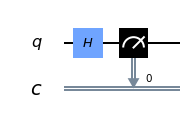

In [26]:
# Create single Qubit Circuit
qc = QuantumCircuit(1, 1)

# Add Hadamard gate and measure results
qc.h(0)
qc.measure(range(1), range(1))
qc.draw(output='mpl')

In [27]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
job = execute(qc, backend, shots=1000)

# Grab the results from the job.
result = job.result()

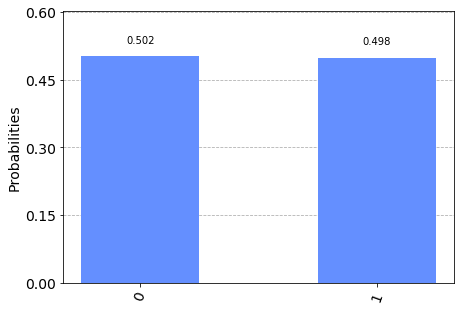

In [28]:
counts = result.get_counts(qc)
plot_histogram(counts)

#### Shorter Algorithm

Create the following quantum circuit and find the state it generates.

<img src="images/qiskit_ex_1.png" width=500>

Can you implement a shorter quantum circuit that generates the same state?

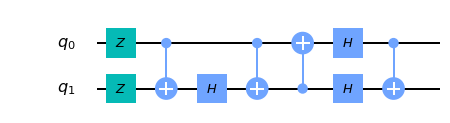

In [29]:
qc = QuantumCircuit(2)
# Quantum Instantaneous Polynomial Time example
qc.z(0)
qc.z(1)
qc.cx(0, 1)
qc.h(1)
qc.cx(0,1)
qc.cx(1,0)
qc.h(1)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [30]:
sv_backend = Aer.get_backend('statevector_simulator')
job = execute(qc, sv_backend)
state = job.result().get_statevector(decimals=3)
print_sv(state)

'(0.707-0j)|00⟩ + (0.707-0j)|01⟩'

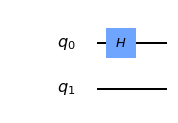

In [31]:
qc_new = QuantumCircuit(2)
qc_new.h(0)
qc_new.draw(output='mpl')

In [32]:
job = execute(qc_new, sv_backend)
state = job.result().get_statevector(decimals=3)
print_sv(state)

'(0.707+0j)|00⟩ + (0.707+0j)|01⟩'

#### Biased Coin Flip

Using a U3 gate on an single qubit create a quantum circuit to simulate an bias coin flip where one side appears twice as often as the other. Sample that circuit using the QasmSimulator backend.

To implement a biased coin we need to put the qubit into the corresponing uneven supperpostion of the states $|0\rangle$ and $|1\rangle$. Therefore, we need to replace the Hadamard gate by an other gate. The most general gate we can use is the $u3$ gate.

$$
u3(\theta, \phi, \lambda) = 
\begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

At the start our qubit is in groundstate $|\psi\rangle = |0\rangle$. We want that the state $|1\rangle$ appears with a probability $\mathrm{Pr}(1)=1/3$ in a measurement. Than we need to find the parameters $(\theta,\phi,\lambda)$ such that 

$$
u3(\theta, \phi, \lambda)
\begin{pmatrix}
1 \\
0
\end{pmatrix} =
\begin{pmatrix}
\sqrt{2/3} \\
\sqrt{1/3}
\end{pmatrix}
.
$$

This results in 

$$ \theta = 2\cos^{-1}\left(\sqrt{2/3}\right) $$
$$ \phi = - i \log \left( \frac{\sqrt{1/3}}{\sin(\theta/2)}\right) = 0$$

The parameter $\lambda$ does not matter in this case, so we put ut to $0$.

In [33]:
from math import acos, sqrt
# calculate rotation parameters
theta = 2*acos(sqrt(2/3.))
phi = 0 # log(sqrt(1/3.)/sin(theta/2.))

In [34]:
qc = QuantumCircuit(1, 1)
qc.u3(theta,phi,0,0)
qc.measure(range(1),range(1));

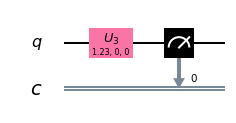

In [35]:
qc.draw(output='mpl')

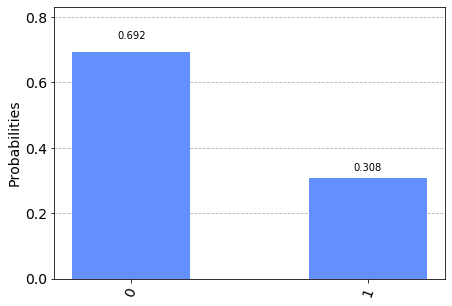

In [36]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
job = execute(qc, backend, shots=1000)

# Grab the results from the job.
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)